In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('gpt_dataset.csv')
data.head()


,Category,Resume
0,Frontend Developer,"As a seasoned Frontend Developer, I have a pro..."
1,Backend Developer,With a solid background in Backend Development...
2,Python Developer,"As a Python Developer, I leverage my expertise..."
3,Data Scientist,"With a background in Data Science, I possess a..."
4,Frontend Developer,Experienced Frontend Developer with a passion ...


#Look and visualize category

In [30]:
print(data['Category'].unique())
print("\n""total categories: "+format(len(data['Category'].unique())))

['Frontend Developer' 'Backend Developer' 'Python Developer'
 'Data Scientist' 'Full Stack Developer'
 'Mobile App Developer (iOS/Android)' 'Machine Learning Engineer'
 'Cloud Engineer']

total categories: 8


In [31]:
print(data['Category'].value_counts())

Category
Backend Developer                     57
Cloud Engineer                        56
Frontend Developer                    54
Data Scientist                        53
Full Stack Developer                  47
Python Developer                      45
Mobile App Developer (iOS/Android)    45
Machine Learning Engineer             43
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Frontend Developer'),
  Text(1, 0, 'Backend Developer'),
  Text(2, 0, 'Python Developer'),
  Text(3, 0, 'Data Scientist'),
  Text(4, 0, 'Full Stack Developer'),
  Text(5, 0, 'Mobile App Developer (iOS/Android)'),
  Text(6, 0, 'Machine Learning Engineer'),
  Text(7, 0, 'Cloud Engineer')])

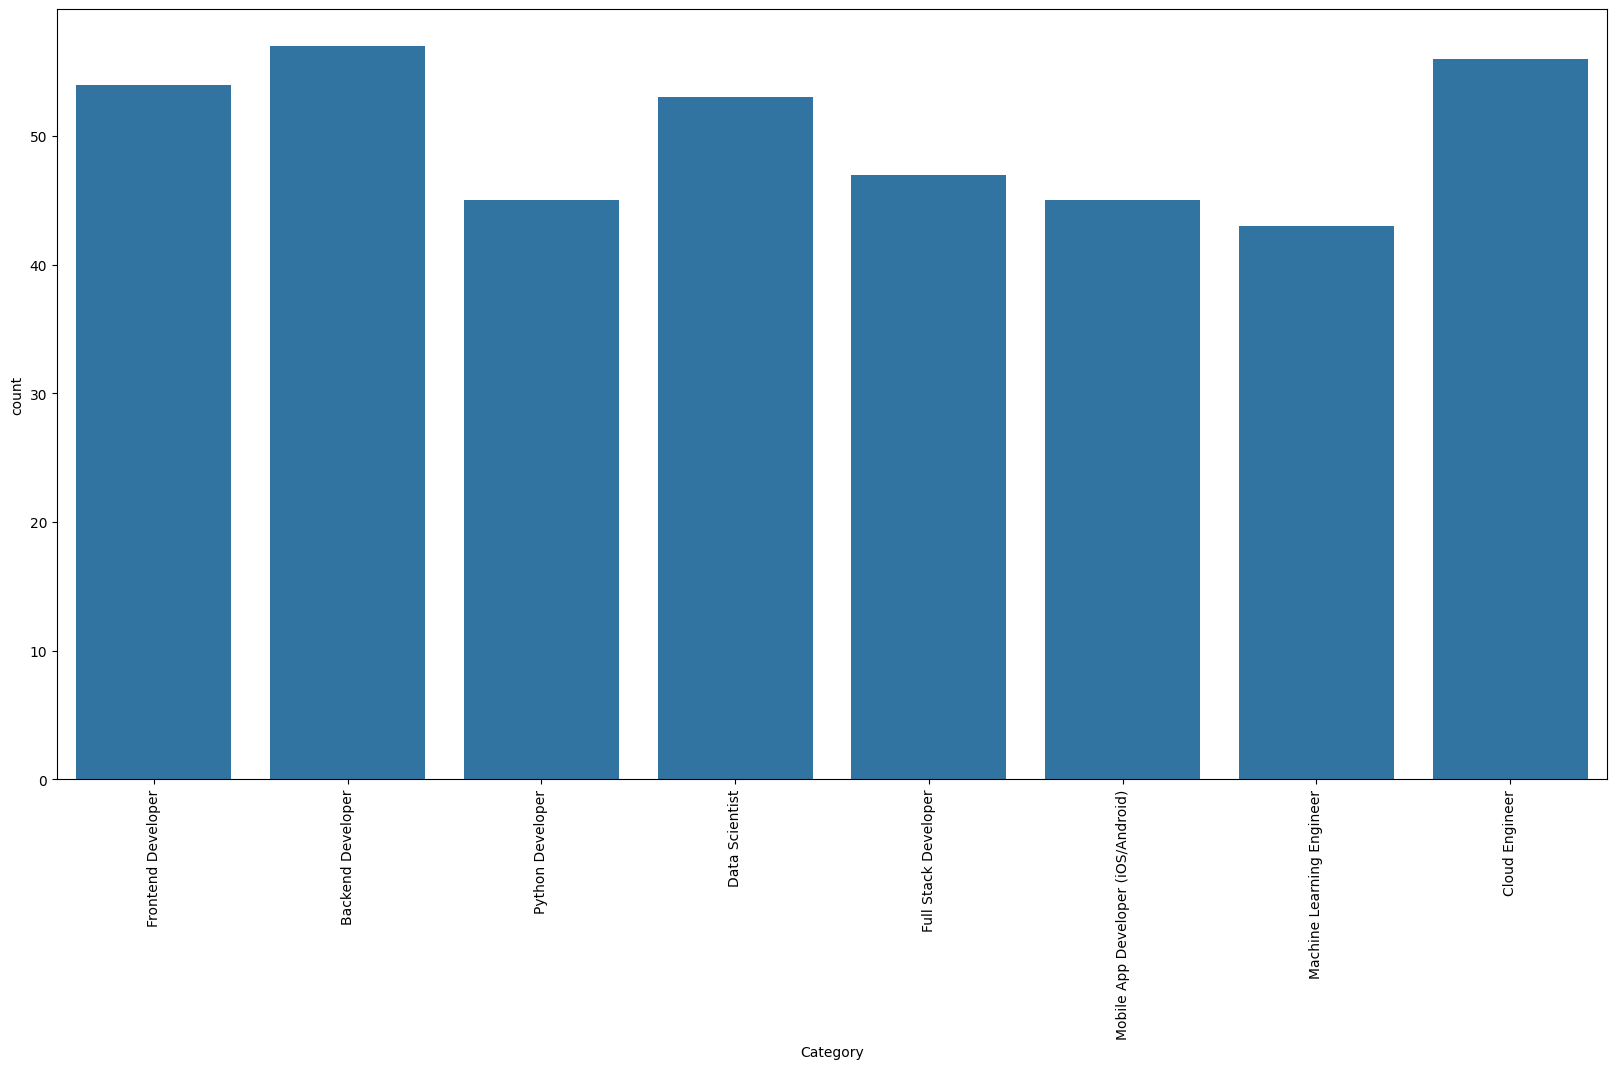

In [32]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x="Category",data=data)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x2492db3f470>,
 [Text(0.9916006314983484, 0.4761598341020343, 'Frontend Developer'),
  Text(0.2567899102558787, 1.0696069100332037, 'Backend Developer'),
  Text(-0.6465637858537404, 0.8899186877588754, 'Python Developer'),
  Text(-1.0942713563577848, 0.11211689727643218, 'Data Scientist'),
  Text(-0.8530453311442178, -0.6944880582220633, 'Full Stack Developer'),
  Text(-0.18060556373512224, -1.0850721774831014, 'Mobile App Developer (iOS/Android)'),
  Text(0.5673644422324684, -0.9423892983742124, 'Machine Learning Engineer'),
  Text(1.0378633613214028, -0.3644717317250265, 'Cloud Engineer')],
 [Text(0.5408730717263718, 0.25972354587383684, '114.2%'),
  Text(0.1400672237759338, 0.583421950927202, '114.0%'),
  Text(-0.35267115592022197, 0.4854101933230229, '113.5%'),
  Text(-0.5968752852860644, 0.06115467124169027, '113.2%'),
  Text(-0.46529745335139144, -0.3788116681211254, '111.7%'),
  Text(-0.09851212567370303, -0.5918575513544189, '111.2%'),
  Text(0.3

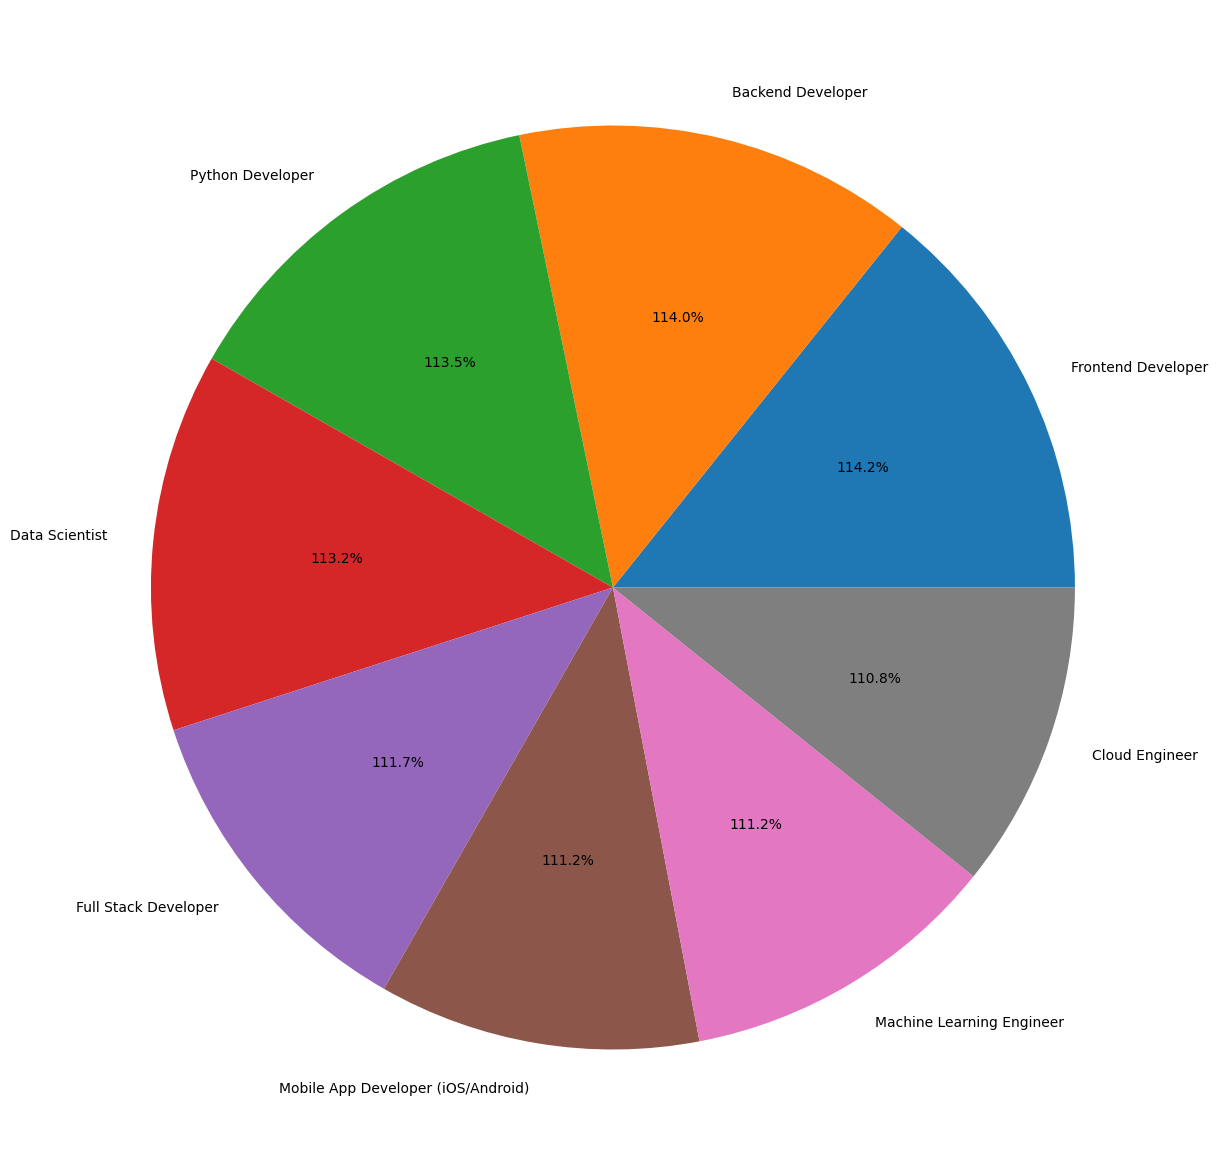

In [33]:
counts=data['Category'].value_counts()
labels= data['Category'].unique()
plt.figure(figsize=(15,15))
plt.pie(counts,labels=labels,autopct='1%.1f%%')


In [34]:
data['Category'][0]

'Frontend Developer'

In [35]:
#data['Resume'][0]

In [36]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', '  ', cleanText)  
    
    cleanText = cleanText.lower()
    cleanText =cleanText.split()
    
    cleanText =[ps.stem(word) for word in cleanText if not word in stopwords.words('english')]
    cleanText =' '.join(cleanText)
    cleanText = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()
    return cleanText



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
data['Resume'] = data['Resume'].apply(lambda x: cleanResume(x))


In [38]:
data['Resume']


0      season frontend developer proven track record ...
1      solid background backend development bring 7 y...
2      python developer leverag expertis python progr...
3      background data science possess uniqu blend an...
4      experienc frontend develop passion craft eleg ...
                             ...                        
395    dynam cloud engin special architect manag clou...
396    skill cloud engin focu build secur scalabl clo...
397    experienc full stack develop expertis develop ...
398    innov full stack develop passion build scalabl...
399    dynam full stack develop special build respons...
Name: Resume, Length: 400, dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])


In [40]:
print(data['Category'])

0      3
1      0
2      7
3      2
4      3
      ..
395    1
396    1
397    4
398    4
399    4
Name: Category, Length: 400, dtype: int32


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(data['Resume'])
requiredText  = tfidf.transform(data['Resume'])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, data['Category'], test_size=0.2, random_state=42)

In [44]:
## This is a multiclassification problem we use KNN 

In [45]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# knn_model = OneVsRestClassifier(KNeighborsClassifier())
# knn_model.fit(X_train, y_train)
# y_pred_knn = knn_model.predict(X_test)

In [46]:
# print("\nKNeighborsClassifier Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
# print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")

In [47]:
#DIFFERENT MODELS

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Train and evaluate LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_logistic)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_logistic)}")


# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)

# print("\nRandom Forest Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
# print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


# svm_model = SVC(kernel='linear', random_state=42)
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)

# print("\nSVM Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")
# print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")



# nb_model = MultinomialNB()
# nb_model.fit(X_train, y_train)
# y_pred_nb = nb_model.predict(X_test)

# print("\nNaive Bayes Results:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}")
# print(f"Classification Report:\n{classification_report(y_test, y_pred_nb)}")


SyntaxError: invalid syntax (3636204460.py, line 7)